Prepare the environment

In [6]:
import gym
import numpy as np


numBlocks = 3
env = gym.make('BlocksWorld-v0')

env.seed(0)
env.reset()

LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.99
EPSILON_START = 0.9
EPSILON_END = 0
CONVERGENCE_LIMIT = 0.001

done = False
num_episodes = 10000

WARN: Environment '<class 'gym.envs.classic_control.blocksworld.BlocksWorldEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


Create the dictionary that will store the Q values

In [7]:
q_values = {}
#q_values = {'hola': 4}
#print (q_values['hola'])

In [8]:
#Prepare the dictionary keys
#Every key is a string like made from state([1 2]) + action (5) , example "1 2 5"
def get_key_from_arrays (state,action):
    state_str = " ".join(str(x) for x in state)
    action_str = str(action)
    dictionary_key = state_str + " " + action_str
    return (dictionary_key)

state = [1,2]
action = 5
print (get_key_from_arrays(state,action))

1 2 5


In [9]:
#Get and Set methods to read q_values from our dictionary
def get_q_value(state,action):
    dictionary_key = get_key_from_arrays(state,action)
    if (dictionary_key in q_values):
        return (q_values[dictionary_key])
    else:
        return 0

def set_q_value(state,action,value):
    dictionary_key = get_key_from_arrays(state,action)
    q_values[dictionary_key] = value

#state = [1,2]
#action = 5
#
#print (get_q_value(state,action))
#set_q_value(state,action,-8)
#print (get_q_value(state,action))




In [10]:
#Generate all possible actions depending on the number of Blocks
from itertools import product
def get_all_possible_actions_bad(nBlocks):
    d1 = range(0,nBlocks+1)
    d2 = range(0,nBlocks+1)    
    allActions = product(d1,d2)
    #for x in p:
    #    print (x)
    return (allActions)

def get_all_possible_actions(nBlocks):
    allActions = np.arange((nBlocks+1)*(nBlocks+1))
    #for x in p:
    #    print (x)
    return (allActions)



In [11]:
#Generate a list with all possible actions
allActions = get_all_possible_actions(numBlocks)

print (allActions)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [12]:
#Check all possible actions and return
#the q-value and the action with the maximum value
def get_maximum_q_value_for_all_possible_actions (state):
    max_value = -1000000.0
    which_action = 0
    for one_action in allActions:    
        val = get_q_value (state,one_action)
        if (val>max_value):
            #print (val)
            #print (max_value)
            max_value = val
            which_action = one_action
    #print ('STATE')
    #print (state)
    #print ('CHOOSING')
    #print (which_action)
    return (max_value,which_action)

#state = (0,1)
#print (get_maximum_q_value_for_all_possible_actions(state))

    

In [13]:
#Time difference update rule of the Q learning algorithm

def calculate_next_q_value (state,action,current_reward, next_state):
    new_q_value = get_q_value (state,action) + \
        LEARNING_RATE*(current_reward + \
        DISCOUNT_FACTOR*(get_maximum_q_value_for_all_possible_actions(next_state)[0]) - get_q_value(state,action))
    converged = get_q_value (state,action)-new_q_value
    set_q_value(state,action,new_q_value)
    return (converged)

In [14]:
#Select either the best action or randomly according
#to epsilon parameter
import random
def choose_next_action_epsilon_greedy(state,epsilon):    
    best_action = get_maximum_q_value_for_all_possible_actions(state)[1]
    #random_action = [random.randint(0,numBlocks-1),random.randint(0,numBlocks)]
    random_action = random.randint(0,(numBlocks+1)*(numBlocks+1)-1)
    BEST = 0
    RANDOM = 1
    next_action_boolean = np.random.choice([BEST, RANDOM],1,  p=[1-epsilon,epsilon])
    if (next_action_boolean == BEST):
        return (best_action)
    else:
        return (random_action)
#print (choose_next_action_epsilon_greedy(EPSILON_START))

In [15]:
#Run episodes until convergence
ep_lengths = []
updates = []
ep_index =[]
n = 0
while (n<num_episodes):    
    steps =1
    done = False
    current_state = env.reset()
    print (n)
    which_epsilon = EPSILON_START*(1- (n/num_episodes))
    #print (which_epsilon)
    while (done == False):
        #print (q_values)        
        next_action = choose_next_action_epsilon_greedy(current_state,which_epsilon)
        #print (next_action)
        obs, reward, done, empty = env.step (next_action)
        ret = calculate_next_q_value(current_state,next_action,reward,obs)
        updates.append(ret)
        ep_index.append(n)
        current_state = obs
        #print ('Next action ' + str(next_action))
        #print ('Obs ' + str(obs))
        #env.render()
        steps +=1    
    #print (done)
    print ("Episode completed, steps:" + str(steps))
    print ('New episode')
    ep_lengths.append(steps)
    n+=1

print ("Average episode length " + str(sum(ep_lengths) / float(len(ep_lengths))))


0

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:167
New episode
2

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:1415
New episode
3

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:98
New episode
4

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:119
New episode
6

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:98
New episode
7

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:131
New episode
8

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:151
New episode
9

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
10

*************** PROBLE

85

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:18
New episode
86

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
87

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
88

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
89

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
90

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:30
New episode
91

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:18
New episode
92

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
93

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:62
New episode
94

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:41
New episode
95

*************** PROB

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
174

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
175

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
176

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
177

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
178

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
179

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
180

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:37
New episode
181

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
182

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:27
New episode
183

***************

261

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
262

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:51
New episode
263

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
264

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
265

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
266

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
267

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
268

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:47
New episode
269

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
270

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
271

**********

345

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
346

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
347

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
348

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:27
New episode
349

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
350

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
351

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
352

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:59
New episode
353

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
354

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
355

***********

436

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
437

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
438

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
439

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
440

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
441

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
442

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
443

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
444

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
445

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
446

**********

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:29
New episode
527

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:19
New episode
528

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:45
New episode
529

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
530

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
531

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
532

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:24
New episode
533

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
534

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
535

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:45
New episode
536

*************

616

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:18
New episode
617

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:77
New episode
618

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:37
New episode
619

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
620

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
621

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
622

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
623

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:24
New episode
624

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:23
New episode
625

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:36
New episode
626

********

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
700

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:75
New episode
701

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
702

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:59
New episode
703

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
704

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
705

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
706

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
707

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:26
New episode
708

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:23
New episode
709

*************

790

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
791

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
792

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
793

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:64
New episode
794

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
795

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
796

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
797

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
798

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
799

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
800

***********


*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:30
New episode
879

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
880

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
881

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
882

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:33
New episode
883

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:61
New episode
884

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
885

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
886

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
887

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:39
New episode
888

*************

965

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
966

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
967

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:51
New episode
968

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
969

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:24
New episode
970

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
971

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
972

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
973

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
974

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
975

*********

1049

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:53
New episode
1050

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:47
New episode
1051

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1052

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1053

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
1054

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1055

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:42
New episode
1056

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
1057

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
1058

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:40
New episode
105

1133

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
1134

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1135

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1136

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1137

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:26
New episode
1138

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:25
New episode
1139

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
1140

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1141

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:23
New episode
1142

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:34
New episode
1143

1222

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
1223

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
1224

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
1225

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:19
New episode
1226

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
1227

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1228

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:44
New episode
1229

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:29
New episode
1230

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:29
New episode
1231

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
123

1311

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:25
New episode
1312

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
1313

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
1314

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1315

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1316

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1317

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
1318

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1319

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:26
New episode
1320

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1321


1399

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:29
New episode
1400

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1401

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1402

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
1403

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1404

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
1405

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1406

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1407

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
1408

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
1409


1487

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1488

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
1489

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
1490

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:23
New episode
1491

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:40
New episode
1492

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
1493

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:34
New episode
1494

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:29
New episode
1495

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
1496

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
14

1571

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:23
New episode
1572

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
1573

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1574

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1575

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1576

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1577

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
1578

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:24
New episode
1579

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
1580

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1581



1657

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
1658

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1659

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
1660

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
1661

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1662

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
1663

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
1664

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
1665

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1666

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
166

1748

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1749

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1750

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:19
New episode
1751

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1752

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
1753

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
1754

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1755

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
1756

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1757

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1758



1838

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1839

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
1840

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:38
New episode
1841

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
1842

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
1843

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
1844

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1845

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:25
New episode
1846

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
1847

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:37
New episode
1848

1928

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
1929

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
1930

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1931

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
1932

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1933

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:40
New episode
1934

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:26
New episode
1935

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
1936

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
1937

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
1938



2019

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
2020

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
2021

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2022

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
2023

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2024

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
2025

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:23
New episode
2026

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2027

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:24
New episode
2028

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
202

2108

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2109

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
2110

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
2111

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:25
New episode
2112

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2113

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2114

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:19
New episode
2115

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2116

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2117

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
2118



*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
2199

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
2200

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2201

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
2202

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2203

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2204

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2205

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
2206

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2207

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2208

********

2288

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
2289

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2290

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
2291

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2292

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
2293

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
2294

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
2295

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2296

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2297

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2298

*

2371

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
2372

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:30
New episode
2373

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
2374

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
2375

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
2376

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
2377

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
2378

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2379

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
2380

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
2381



2462

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
2463

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
2464

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
2465

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2466

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2467

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2468

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
2469

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
2470

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2471

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:28
New episode
2472

*

2554

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2555

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2556

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
2557

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:22
New episode
2558

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
2559

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
2560

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2561

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
2562

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
2563

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
2564

*

2645

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:27
New episode
2646

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:18
New episode
2647

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:24
New episode
2648

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
2649

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:30
New episode
2650

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
2651

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
2652

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
2653

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
2654

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
2

2738

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
2739

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
2740

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
2741

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
2742

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
2743

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2744

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2745

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
2746

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2747

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2748



2827

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
2828

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
2829

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:19
New episode
2830

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2831

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2832

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2833

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
2834

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
2835

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2836

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
2837


2916

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
2917

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2918

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2919

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
2920

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
2921

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:20
New episode
2922

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
2923

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
2924

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
2925

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
2926

*

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3002

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
3003

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3004

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
3005

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3006

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
3007

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3008

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:18
New episode
3009

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3010

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3011

********

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3093

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
3094

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
3095

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
3096

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
3097

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
3098

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3099

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3100

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3101

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3102

*****

3183

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
3184

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3185

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3186

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3187

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3188

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3189

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3190

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
3191

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3192

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3193

***

3267

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
3268

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
3269

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3270

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3271

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
3272

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:21
New episode
3273

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3274

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
3275

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3276

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
3277



3359

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3360

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3361

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3362

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3363

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
3364

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
3365

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
3366

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3367

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3368

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
3369

*

3442

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3443

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:18
New episode
3444

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3445

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
3446

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
3447

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3448

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
3449

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3450

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3451

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
3452

*

3525

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
3526

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:15
New episode
3527

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3528

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
3529

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3530

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3531

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
3532

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3533

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
3534

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
3535

***

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
3616

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3617

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3618

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3619

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
3620

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
3621

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3622

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3623

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
3624

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
3625

********

3707

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3708

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3709

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3710

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
3711

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
3712

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3713

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3714

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3715

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3716

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3717

***

3792

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
3793

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3794

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3795

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3796

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
3797

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3798

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3799

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
3800

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
3801

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3802

*

3875

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3876

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3877

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
3878

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
3879

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
3880

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
3881

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
3882

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3883

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3884

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3885

**

3960

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
3961

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
3962

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
3963

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
3964

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3965

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:16
New episode
3966

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
3967

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
3968

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
3969

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
3970

**

4043

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4044

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4045

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4046

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4047

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4048

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4049

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4050

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4051

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:17
New episode
4052

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4053

***

4127

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4128

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
4129

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4130

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
4131

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
4132

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4133

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4134

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
4135

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4136

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4137

****

4210

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4211

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4212

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
4213

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
4214

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
4215

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4216

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4217

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4218

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
4219

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4220

****

4304

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4305

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
4306

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4307

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4308

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4309

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4310

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4311

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4312

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
4313

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
4314

*

4388

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
4389

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4390

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4391

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4392

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4393

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4394

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
4395

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4396

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
4397

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4398

*

4473

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4474

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
4475

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
4476

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
4477

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
4478

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4479

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
4480

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4481

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
4482

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4483

***

4557

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4558

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4559

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4560

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:13
New episode
4561

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4562

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4563

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4564

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
4565

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
4566

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
4567

*

4642

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4643

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
4644

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4645

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4646

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:14
New episode
4647

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4648

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:18
New episode
4649

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
4650

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4651

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4652



4727

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4728

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4729

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4730

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4731

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4732

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4733

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4734

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
4735

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4736

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4737

***

4818

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4819

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
4820

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
4821

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
4822

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4823

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4824

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4825

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4826

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
4827

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4828

****

4901

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4902

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4903

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4904

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
4905

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4906

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4907

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4908

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4909

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
4910

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4911

****

4987

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4988

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
4989

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
4990

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
4991

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
4992

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
4993

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
4994

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
4995

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
4996

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
4997

**

5071

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5072

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
5073

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
5074

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5075

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5076

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5077

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5078

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5079

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5080

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5081

***

5157

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5158

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5159

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
5160

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5161

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5162

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
5163

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
5164

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5165

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5166

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5167

***

5245

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:12
New episode
5246

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5247

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5248

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5249

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5250

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5251

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5252

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5253

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5254

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5255

***

5331

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5332

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
5333

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5334

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
5335

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5336

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5337

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
5338

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5339

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5340

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5341

**

5417

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5418

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5419

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5420

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5421

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5422

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5423

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5424

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5425

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5426

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5427

****

5500

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
5501

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
5502

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5503

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
5504

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5505

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5506

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5507

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5508

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
5509

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5510

**

5587

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5588

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5589

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5590

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5591

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5592

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5593

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5594

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5595

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5596

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5597

****

5674

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5675

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5676

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5677

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5678

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
5679

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5680

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5681

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5682

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
5683

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5684

****

5763

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5764

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5765

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5766

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5767

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5768

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5769

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5770

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5771

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5772

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5773

****

5850

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5851

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5852

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5853

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5854

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5855

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
5856

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5857

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5858

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5859

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
5860

****

5938

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5939

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
5940

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
5941

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5942

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5943

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:11
New episode
5944

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5945

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
5946

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
5947

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
5948

**

6023

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6024

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6025

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6026

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6027

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6028

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6029

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6030

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
6031

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6032

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6033

****

6109

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6110

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6111

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6112

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6113

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6114

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6115

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6116

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6117

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6118

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6119

****

6199

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6200

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6201

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6202

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6203

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6204

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
6205

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
6206

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6207

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6208

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6209

****

6286

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6287

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6288

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6289

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6290

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6291

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6292

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6293

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
6294

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6295

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6296

****

6369

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6370

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6371

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6372

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6373

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6374

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6375

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6376

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6377

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6378

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6379

****

6454

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6455

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6456

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6457

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6458

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6459

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6460

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6461

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6462

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6463

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6464

****

6538

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6539

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6540

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
6541

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6542

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6543

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6544

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
6545

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6546

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6547

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6548

****

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6627

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6628

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6629

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6630

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6631

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6632

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6633

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6634

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6635

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6636

**********

6713

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6714

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6715

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6716

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6717

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6718

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6719

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6720

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6721

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6722

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6723

****

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6801

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6802

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6803

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6804

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6805

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
6806

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
6807

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6808

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6809

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6810

**********

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6888

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6889

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6890

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6891

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6892

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6893

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6894

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6895

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6896

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6897

**********

6981

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6982

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6983

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6984

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
6985

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
6986

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6987

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
6988

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
6989

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
6990

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
6991

****

7066

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
7067

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7068

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7069

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
7070

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7071

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
7072

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7073

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7074

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7075

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7076

****

7150

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7151

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7152

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7153

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7154

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7155

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:9
New episode
7156

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7157

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7158

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7159

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7160

****

7238

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7239

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7240

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7241

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7242

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7243

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
7244

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7245

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7246

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7247

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7248

****

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7325

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7326

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7327

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7328

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7329

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
7330

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7331

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7332

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7333

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7334

**********

7411

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7412

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
7413

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7414

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7415

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7416

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7417

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7418

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
7419

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7420

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7421

***

7496

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
7497

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7498

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7499

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7500

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7501

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7502

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7503

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7504

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7505

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7506

****

7585

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7586

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7587

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7588

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7589

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7590

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7591

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7592

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7593

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
7594

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7595

****

7670

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7671

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7672

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7673

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7674

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7675

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7676

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7677

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7678

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:10
New episode
7679

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7680

***

7757

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7758

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7759

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7760

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7761

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7762

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7763

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7764

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7765

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7766

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7767

****

7845

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7846

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7847

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7848

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7849

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7850

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7851

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7852

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7853

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7854

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7855

****

7931

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7932

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
7933

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7934

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
7935

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
7936

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7937

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
7938

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7939

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
7940

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
7941

****

8018

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8019

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8020

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8021

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8022

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8023

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8024

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8025

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8026

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8027

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8028

****

8105

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8106

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
8107

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8108

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8109

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8110

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8111

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8112

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8113

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8114

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8115

****

8193

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8194

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8195

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8196

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
8197

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8198

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8199

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8200

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8201

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8202

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8203

****

8284

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8285

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8286

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8287

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8288

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8289

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8290

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8291

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
8292

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8293

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8294

****

8370

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8371

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8372

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8373

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8374

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8375

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
8376

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8377

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8378

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8379

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8380

****

8455

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8456

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8457

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8458

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8459

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8460

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8461

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8462

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8463

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8464

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8465

****

8543

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8544

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8545

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8546

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8547

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8548

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8549

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8550

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8551

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8552

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8553

****

8630

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8631

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8632

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8633

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8634

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8635

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8636

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8637

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8638

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8639

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8640

****

8717

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8718

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8719

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8720

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8721

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8722

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8723

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
8724

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8725

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8726

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8727

****

8803

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
8804

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8805

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8806

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8807

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8808

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8809

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8810

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8811

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8812

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8813

****

8892

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8893

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8894

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8895

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8896

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8897

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8898

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8899

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8900

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8901

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
8902

****

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8982

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8983

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8984

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8985

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8986

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
8987

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
8988

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8989

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
8990

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
8991

**********

9070

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9071

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9072

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9073

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9074

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9075

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9076

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9077

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9078

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9079

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9080

****

9158

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9159

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9160

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9161

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9162

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9163

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9164

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9165

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9166

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9167

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9168

****

9247

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9248

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9249

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9250

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9251

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9252

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9253

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9254

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9255

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9256

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9257

****

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9335

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9336

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9337

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9338

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9339

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9340

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9341

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9342

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9343

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9344

**********

9421

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9422

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9423

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9424

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9425

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9426

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9427

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9428

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9429

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9430

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9431

****

9507

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9508

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9509

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9510

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9511

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9512

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9513

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9514

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
9515

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9516

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9517

****

9596

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:7
New episode
9597

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9598

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9599

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9600

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9601

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9602

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9603

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9604

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9605

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9606

****

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9688

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9689

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9690

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9691

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9692

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9693

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9694

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9695

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9696

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9697

**********

9774

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9775

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9776

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9777

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9778

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9779

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9780

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9781

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9782

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9783

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9784

****

9865

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9866

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9867

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9868

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9869

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9870

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9871

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9872

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9873

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9874

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9875

****

9954

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9955

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9956

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9957

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9958

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:2
New episode
9959

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9960

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
9961

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
9962

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
9963

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
9964

****

In [16]:
#print (q_values)
#for k,v in q_values.items():
#    print (k,v)

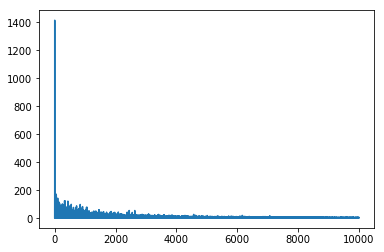

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
#Plot the episode length sequence
plt.plot(ep_lengths)

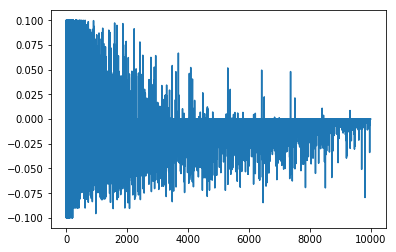

In [18]:
#Plot the TD update values, we should see that the TD update value is decreasing over time if the algorithm
#is converging
plt.plot(ep_index,updates)

In [19]:
print ('Average length of the last 20 episodes')
print (sum(ep_lengths[-20:])/20)

Average length of the last 20 episodes
3.6
